# Project: Relationship between Living Standards and Several Metrics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> GDP per capita has always been widely regarded as pretty accurate predictor of standards of living. In this report, we will explore the effect and correlations of different societal conditions and variables and how they have a positive or negative correlation with GDP per Capita. The main metric to be used is GDP per capita PPP-inflation adjusted to account for differences between countries' cost of living and inflation across time. The source of all the data in this analysis is GapMinder Database. Find more information and databases at: https://www.gapminder.org/
>
> The variables that will be tested for correlation are fertility rates per woman, population growth, and average number of school years in a country captured in the Education Rating. Other variables to be explored are inequality of income (GINI Coefficient, find more at https://data.oecd.org/inequality/income-inequality.htm), and industrialization as variables on the main metric which is the GDP per capita PPP-inflation adjusted..

<a id='wrangling'></a>
## Data Wrangling

The first step would be to load the python packages that can be utilized, and load all the csv files downloaded from GapMinder. The dataframes will be examined for missing, inconsistent, or irrelevant information. Also the total population of the countries will be a factor in how a country would affect the relationships observed to make the analysis as representative as possible.

### General Properties

In [1]:
# Importing packages and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_context("poster")
sns.set_theme(style="darkgrid", rc=custom_params)


# Dependent Metric Examined
gdp_per_capita_adj = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv').set_index('country')

# Input Metrics
fertility = pd.read_csv('children_per_woman_total_fertility.csv').set_index('country')
industry_of_gdp = pd.read_csv('industry_percent_of_gdp.csv').set_index('country')
inequality = pd.read_csv('gini.csv').set_index('country')
population_growth = pd.read_csv('population_growth_annual_percent.csv').set_index('country')
education = pd.read_csv('owid_education_idx.csv').set_index('country')
population = pd.read_csv('population_total.csv').set_index('country')


### Data Cleaning

In [2]:
fertility.shape,industry_of_gdp.shape,inequality.shape,population_growth.shape,education.shape,population.shape

((202, 301), (204, 61), (197, 251), (217, 60), (189, 148), (197, 301))

In [3]:
industry_of_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, Aruba to Zimbabwe
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    40 non-null     float64
 1   1961    42 non-null     float64
 2   1962    43 non-null     float64
 3   1963    46 non-null     float64
 4   1964    47 non-null     float64
 5   1965    62 non-null     float64
 6   1966    65 non-null     float64
 7   1967    66 non-null     float64
 8   1968    69 non-null     float64
 9   1969    70 non-null     float64
 10  1970    78 non-null     float64
 11  1971    79 non-null     float64
 12  1972    79 non-null     float64
 13  1973    79 non-null     float64
 14  1974    80 non-null     float64
 15  1975    85 non-null     float64
 16  1976    88 non-null     float64
 17  1977    93 non-null     float64
 18  1978    95 non-null     float64
 19  1979    95 non-null     float64
 20  1980    102 non-null    float64
 21  1981    105 non-null    float64
 22

The shape of the dataframes shows that they all contain data for around 200 countries, starting from the year 1980 as shown in the industry as a percentage of GDP which is the smallest dataframe we have. The analysis will be conducted starting from the year 1980 for countries that have all their data complete, as those countries will include the overwhelming majority of the world's population.

In [4]:
column_names = ['Metric','1980','1985','1990','1995','2000','2005','2010','2015']
indices=education.index

Due to the fact that the metrics measured tend to change very little from year to year, an acceptable approximation would taking 5 year averages for all metrics starting from 1980 to 2019. As this is a very repetitive procedure a function is defined to automate the new smaller dataframes.

In [5]:
def dataset_average(empty_dataframe,loaded_dataframe,indices):
    for index in indices:
        if index in loaded_dataframe.index:
            empty_dataframe.loc[index,'1980'] = loaded_dataframe.loc[index,'1980':'1984'].astype(float).mean()
            empty_dataframe.loc[index,'1985'] = loaded_dataframe.loc[index,'1985':'1989'].astype(float).mean()
            empty_dataframe.loc[index,'1990'] = loaded_dataframe.loc[index,'1990':'1994'].astype(float).mean()
            empty_dataframe.loc[index,'1995'] = loaded_dataframe.loc[index,'1995':'1999'].astype(float).mean()
            empty_dataframe.loc[index,'2000'] = loaded_dataframe.loc[index,'2000':'2004'].astype(float).mean()
            empty_dataframe.loc[index,'2005'] = loaded_dataframe.loc[index,'2005':'2009'].astype(float).mean()
            empty_dataframe.loc[index,'2010'] = loaded_dataframe.loc[index,'2010':'2014'].astype(float).mean()
            empty_dataframe.loc[index,'2015'] = loaded_dataframe.loc[index,'2015':'2019'].astype(float).mean()

In order to only collect the data of countries that have complete data in the data sets being examined, countries with missing data will be dropped from the industrialization dataset. Only the countries that have complete industrialization data will be used as indices to collect the data from the other metrics.

In [6]:
Industry = pd.DataFrame(columns=column_names,index=indices)
Industry.loc[:,'Metric'] = 'Industry % of GDP'

dataset_average(Industry,industry_of_gdp,indices)

Industry.dropna(inplace=True)

indices=Industry.index

In [7]:
Fertility = pd.DataFrame(columns=column_names,index=indices)
Fertility.loc[:,'Metric'] = 'Fertility'

dataset_average(Fertility,fertility,indices)

Fertility.dropna(inplace=True)

In [8]:
Inequality = pd.DataFrame(columns=column_names,index=indices)
Inequality.loc[:,'Metric'] = 'Inequality of Income'

dataset_average(Inequality,inequality,indices)

Inequality.dropna(inplace=True)

In [9]:
P_Growth = pd.DataFrame(columns=column_names,index=indices)
P_Growth.loc[:,'Metric'] = 'Population Growth'

population_growth.replace(to_replace='−', value='-',inplace=True,regex=True)

dataset_average(P_Growth,population_growth,indices)

P_Growth.dropna(inplace=True)

The population growth dataset had an issue with the encoding of the '-' sign in the negative values, as it is the only dataset that includes the negative values. After a lot of research, a thread was found from someone who faced the same issue and how he replaced the '-' sign in the datasets with a '-' sign that the 'astype(float)' method can deal with. The error and the solution can be found in the link: https://stackoverflow.com/questions/45269652/python-convert-string-to-float-error-with-negative-numbers. The solution was not for a dataframe so it had to be tweaked and the regex argument used to fix the issue in this dataset.

In [10]:
Education = pd.DataFrame(columns=column_names,index=indices)
Education.loc[:,'Metric'] = 'Education Rating'

dataset_average(Education,education,indices)

Education.dropna(inplace=True)

The second inconsistency faced was that some metric like the GDP Per Capita and the population metrics had values in the thousands and millions and where appreviated as 10k instead of 10000 for example. So after reseach a function was found to fix this same issue. Again it was not for a dataset and it didn't work quite right as it removed all values that didn't have appreviations so it had to be tweaked until it worked for the dataset. The function can be found in: https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe.

In [11]:
def value_to_float(x):
    n=x
    if type(n) == str:
        if 'k' in x:
            if len(x) > 1:
                n = float(x.replace('k', '')) * 1000
            else:
                n = 1000.0
        if 'M' in x:
            if len(x) > 1:
                n = float(x.replace('M', '')) * 1000000
            else:
                n = 1000000.0
        if 'B' in x:
            if len(x) > 1:
                n = float(x.replace('B', '')) * 1000000000
            else:
                n = 1000000000.0
    return n
    
    

In [12]:
Living_Standards = pd.DataFrame(columns=column_names,index=indices)
Living_Standards.loc[:,'Metric'] = 'Living Standards'

gdp=gdp_per_capita_adj.copy()
cols = gdp.columns[1:]

for col in cols:
    gdp[col] = gdp[col].apply(value_to_float)

dataset_average(Living_Standards,gdp,indices)

Living_Standards.dropna(inplace=True)

In [13]:
Population = pd.DataFrame(columns=column_names,index=indices)
Population.loc[:,'Metric'] = 'Total Population'

population_total=population.copy()
cols = population_total.columns[1:]

for col in cols:
    population_total[col] = population_total[col].apply(value_to_float)

dataset_average(Population,population_total,indices)

Population.dropna(inplace=True)

The next step was to concatenate all the datasets and count the metric for each country and eleminate any country with missing data. As a result, 83 countries, including all the biggest countries, made it through the filtering.

In [14]:
Datasets = [Fertility,Industry,P_Growth,Inequality,Education,Living_Standards,Population]
Major_Dataset = pd.concat(Datasets,join='inner')
Major_Dataset.sort_values('country',inplace=True)

In [15]:
Major_Dataset.groupby('country').count()

,Metric,1980,1985,1990,1995,2000,2005,2010,2015
country,,,,,,,,,
Antigua and Barbuda,6,6,6,6,6,6,6,6,6
Argentina,7,7,7,7,7,7,7,7,7
Austria,7,7,7,7,7,7,7,7,7
Bangladesh,7,7,7,7,7,7,7,7,7
Belize,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...
United Arab Emirates,7,7,7,7,7,7,7,7,7
Uruguay,7,7,7,7,7,7,7,7,7
Vanuatu,6,6,6,6,6,6,6,6,6


As shown some countries had only 6 metrics completed so a filter was applied to drop any country with any number of metrics available other than 7.

In [16]:
Dataset = Major_Dataset[Major_Dataset.groupby('country').count() == 7].dropna()
Dataset.groupby('Metric').count()

,1980,1985,1990,1995,2000,2005,2010,2015
Metric,,,,,,,,
Education Rating,83,83,83,83,83,83,83,83
Fertility,83,83,83,83,83,83,83,83
Industry % of GDP,83,83,83,83,83,83,83,83
Inequality of Income,83,83,83,83,83,83,83,83
Living Standards,83,83,83,83,83,83,83,83
Population Growth,83,83,83,83,83,83,83,83
Total Population,83,83,83,83,83,83,83,83


The data sets are complete, consistent, and clean and are ready to be explored with charts.





<a id='eda'></a>
## Exploratory Data Analysis

### What variables are correlated with high living standards

The first question in this analysis is which of the metrics are most correlated with high standards of living. So scatter plot for all the variable are below. An addition scatter plot is for the correlation between woman fertility and education years metric.

In [17]:
Countries = Dataset.index.unique()

ER=Dataset[Dataset.Metric == 'Education Rating']
FE=Dataset[Dataset.Metric == 'Fertility']
PG=Dataset[Dataset.Metric == 'Population Growth']
IN=Dataset[Dataset.Metric == 'Industry % of GDP']
GI=Dataset[Dataset.Metric == 'Inequality of Income']
LS=Dataset[Dataset.Metric == 'Living Standards']
PT=Dataset[Dataset.Metric == 'Total Population']


It would be more representative for countries with bigger population to be shown as bigger dots in the scatter plot so the population was used as marker area. However, the difference in population was huge that a few countries ended up domination the plot. An approach was tried to apply logarithmic function from the numpy package to decrease the difference in size between the dots to a reasonable range. The logarithmic funtion, however, crushed the difference alltogether. After a lot of experimenting, the fifth root of the population size showed the difference in population size in the most reasonable manner.

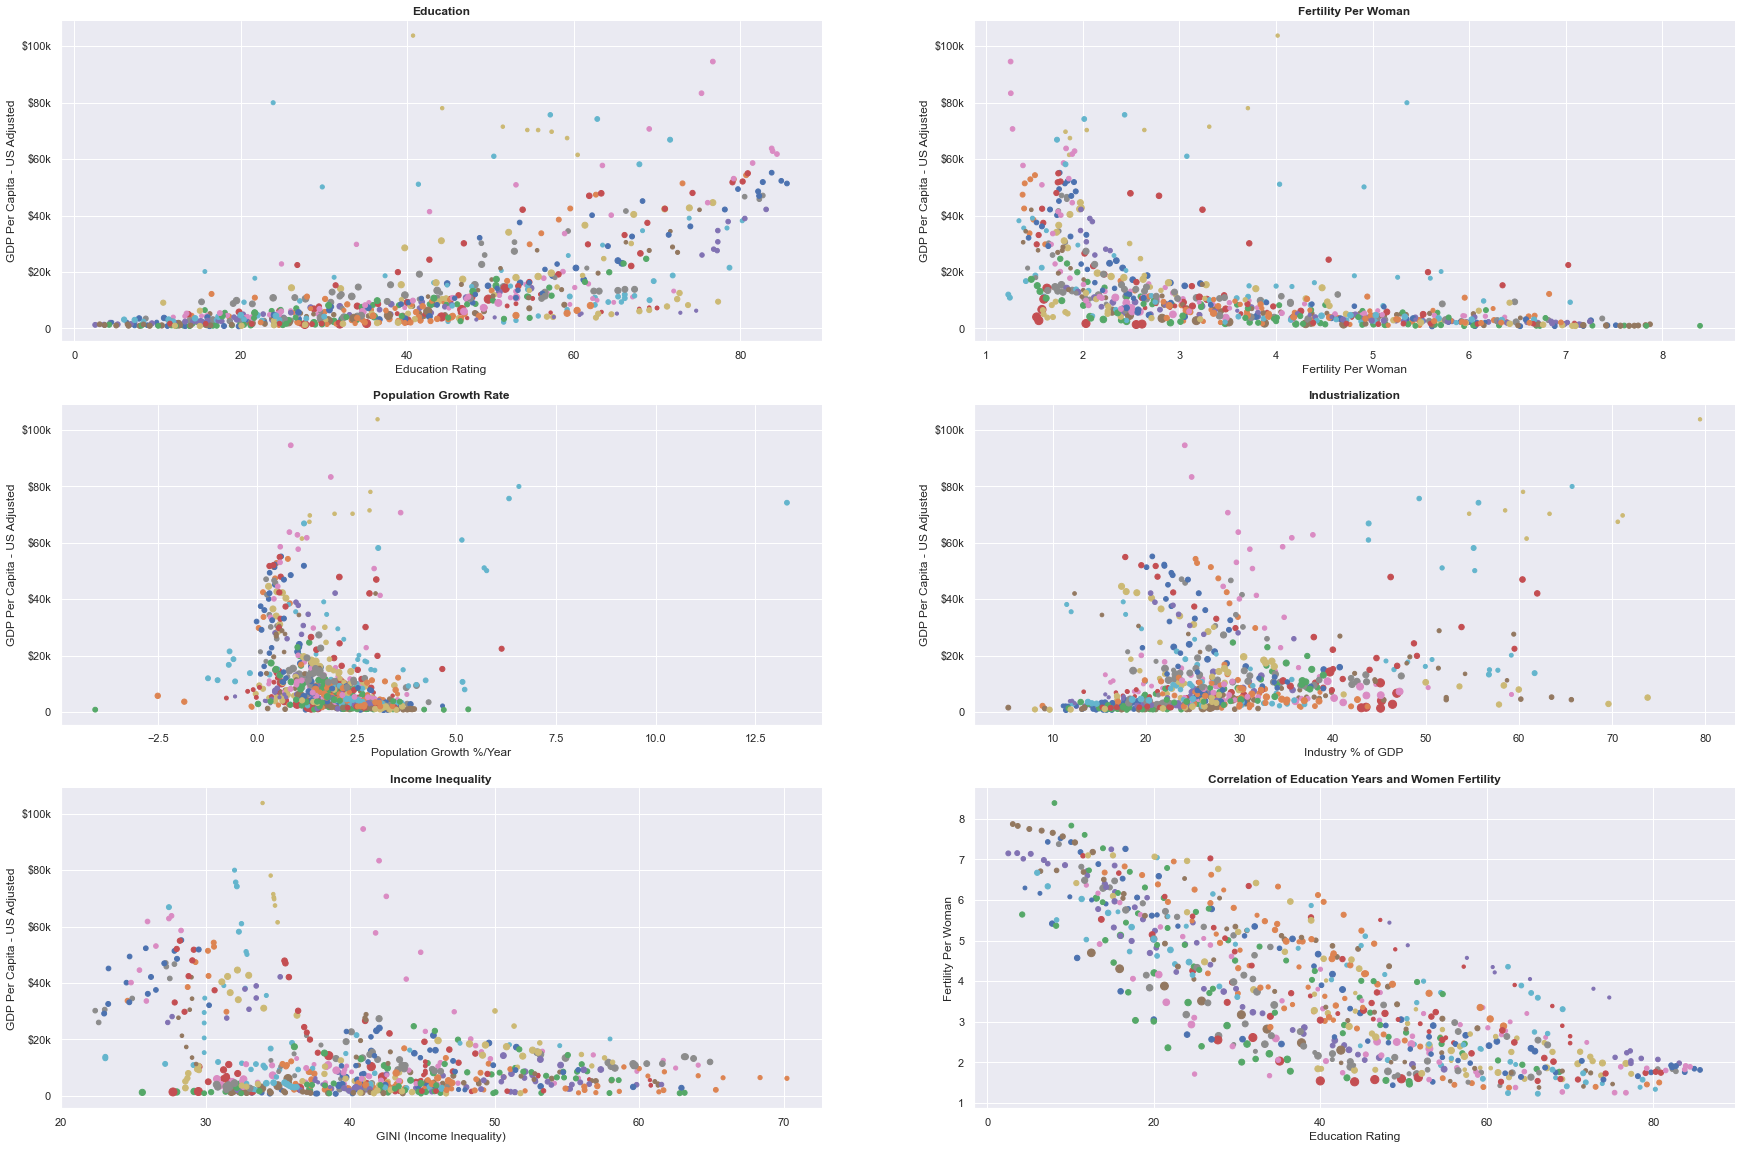

In [18]:
##
plt.figure(figsize=(30,20))
ticks=[0,20000,40000,60000,80000,100000]
ylabels=['0','$20k','$40k','$60k','$80k','$100k']

for Country in Countries:
    plt.subplot(3,2,1)
    plt.scatter(ER.loc[Country,'1980':'2015'],LS.loc[[Country],'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))

plt.xlabel('Education Rating')
plt.ylabel('GDP Per Capita - US Adjusted')
plt.title('Education',loc='center',fontweight='bold')
plt.yticks(ticks=ticks,labels=ylabels)


##
##
for Country in Countries:
    plt.subplot(3,2,2)
    plt.scatter(FE.loc[Country,'1980':'2015'],LS.loc[[Country],'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))
plt.xlabel('Fertility Per Woman')
plt.ylabel('GDP Per Capita - US Adjusted')
plt.title('Fertility Per Woman',loc='center',fontweight='bold')
plt.yticks(ticks=ticks,labels=ylabels)



##
##
for Country in Countries:
    plt.subplot(3,2,3)
    plt.scatter(PG.loc[Country,'1980':'2015'],LS.loc[[Country],'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))

plt.xlabel('Population Growth %/Year')
plt.ylabel('GDP Per Capita - US Adjusted')
plt.title('Population Growth Rate',loc='center',fontweight='bold')
plt.yticks(ticks=ticks,labels=ylabels)


##
##
for Country in Countries:
    plt.subplot(3,2,4)
    plt.scatter(IN.loc[Country,'1980':'2015'],LS.loc[[Country],'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))
    
plt.xlabel('Industry % of GDP')
plt.ylabel('GDP Per Capita - US Adjusted')
plt.title('Industrialization',loc='center',fontweight='bold')
plt.yticks(ticks=ticks,labels=ylabels)


##
##
for Country in Countries:
    plt.subplot(3,2,5)
    plt.scatter(GI.loc[Country,'1980':'2015'],LS.loc[[Country],'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))
    
plt.xlabel('GINI (Income Inequality)')
plt.ylabel('GDP Per Capita - US Adjusted')
plt.title('Income Inequality',loc='center',fontweight='bold')
plt.yticks(ticks=ticks,labels=ylabels)


##
##
for Country in Countries:
    plt.subplot(3,2,6)
    plt.scatter(ER.loc[[Country],'1980':'2015'],FE.loc[Country,'1980':'2015'],s=np.power(PT.loc[Country,'1980':'2015'].astype(float),1/5))
    
plt.ylabel('Fertility Per Woman')
plt.xlabel('Education Rating')
plt.title('Correlation of Education Years and Women Fertility',loc='center',fontweight='bold');


##

The scatter plots show the following:
- Strong correlation between education years and standards of living
- Substantial negative correlation between fertility per woman and standards of living
- Almost all high income counrties have very low population growth, but not less than zero
- Some positive correlation between industry sector of the GDP and GDP per capita
- Negative correlation between income inequality and living standards, with all high income countries have lower inequality
- Strong negative correlation between women fertility and number of education years

### Characteristics of the Fastest Improving Countries

The second question would be about what changes happened to the countries that achieved higher than average development in the last 40 years. This would be beneficial to the countries that are working to improve their standards of living as well. First the average increase in GDP per capita was calculated and the datasets where filter for above average improvement.

In [19]:
HLS = LS[(LS['2015']-LS['1980'])>(LS['2015']-LS['1980']).mean()]

The problem of the difference in population size here showed up again. In these charts, the average population size throughout the 40 years was used as line thickness. After experimenting, dividing by 5 million resulted in the most presentable charts.

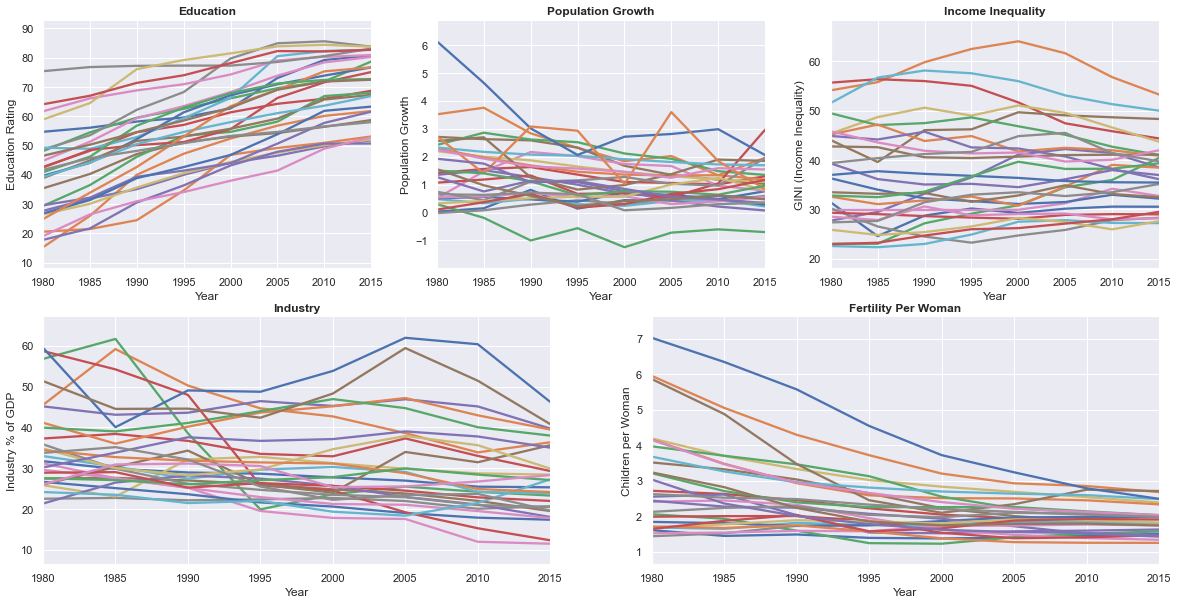

In [21]:
##
plt.figure(figsize=(20,10))

for country in HLS.index:
    plt.subplot(2,3,1)
    plt.plot(HLS.columns[1:9],ER.loc[country,'1980':'2015'],linewidth=(PT.loc[Country,'1980':'2015'].mean())/5000000)
plt.ylabel('Education Rating')
plt.xlabel('Year')
plt.title('Education',loc='center',fontweight='bold')
plt.margins(x=0,y=0.1)


##
##
for country in HLS.index:
    plt.subplot(2,3,2)
    plt.plot(HLS.columns[1:9],PG.loc[country,'1980':'2015'],linewidth=(PT.loc[Country,'1980':'2015'].mean())/5000000)
plt.ylabel('Population Growth')
plt.xlabel('Year')
plt.title('Population Growth',loc='center',fontweight='bold')
plt.margins(x=0,y=0.1)


##
##
for country in HLS.index:
    plt.subplot(2,3,3)
    plt.plot(HLS.columns[1:9],GI.loc[country,'1980':'2015'],linewidth=(PT.loc[Country,'1980':'2015'].mean())/5000000)
plt.ylabel('GINI (Income Inequality)')
plt.xlabel('Year')
plt.title('Income Inequality',loc='center',fontweight='bold')
plt.margins(x=0,y=0.1)


##
for country in HLS.index:
    plt.subplot(2,2,3)
    plt.plot(HLS.columns[1:9],IN.loc[country,'1980':'2015'],linewidth=(PT.loc[Country,'1980':'2015'].mean())/5000000)
plt.ylabel('Industry % of GDP')
plt.xlabel('Year')
plt.title('Industry',loc='center',fontweight='bold')
plt.margins(x=0,y=0.1)


##
##
for country in HLS.index:
    plt.subplot(2,2,4)
    plt.plot(HLS.columns[1:9],FE.loc[country,'1980':'2015'],linewidth=(PT.loc[Country,'1980':'2015'].mean())/5000000)
plt.ylabel('Children per Woman')
plt.xlabel('Year')
plt.title('Fertility Per Woman',loc='center',fontweight='bold');
plt.margins(x=0,y=0.1)

##

The line plots shows the following characteristics regarding best improving countries:
- Increase in mean education years
- Decline in population growth
- A specific range on income inequality
- Decline in industry sector percentage
- Sharp decline in fertility per woman

<a id='conclusions'></a>
## Conclusions


### Fertility and Education: A Major Factor
The charts show some interesting correlations. First, lower fertility per woman have a very strong correlation with higher the standards of living. Even more, the countries that have achieved more than average increase in GDP per capita had a decline in fertility per woman during the 40 years. Only 5 countries out of 23 have an average of more than 2 children per woman and no country shows more than 3 children per woman. Another major correlation is the education rating which is a metric for number of years in school. This metric is the only one that shows a significant positive correlation with high living standards. This metric also shows a substantial negative correlation with women fertility as well. These correlation suggest that it might be very difficult to have a high standards of living with high fertility. The best improving countries seem to have a decline in population growth as well as shown in the line charts, although there is no definitive correlation in the scatter plot.

### Income Inequality and Industrialization: Interesting results
The scatter plots show a negative correlation between the income inequality and living standards. There is some positive correlation between industrialization and higher GDP per capita as well. However, the line plots does not show a decline in income inequality. It shows that there is a certain range on inequality that all improving countries tend to settle at which is about 30-55. Countries that were lower become less equal as their GDP per capita improved and countries that were higher had the equality metric improve. However, there is a very clear decline in the industry sector in improving countries. This can be attributed to the movement toward services sector and the increased standards of living increase cost of production, which negatively affects manufacturing, but further research is needed.